In [5]:
import numpy as np
import pandas as pd

# 設置隨機種子以便重現結果
np.random.seed(42)

# 生成數據的數量
num_samples = 100

# 生成 x 和 y 座標
x_coords = np.random.uniform(low=0.0, high=100.0, size=num_samples)
y_coords = np.random.uniform(low=0.0, high=100.0, size=num_samples)

# 生成 score 值（介於 0 和 1 之間）
scores = np.random.uniform(low=0.0, high=1.0, size=num_samples)

# 生成 cluster_label（介於 0 和 5 之間）
# cluster_labels = np.random.randint(low=0, high=6, size=num_samples)

# 將數據組合成 DataFrame
data = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'score': scores
})

kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster_label'] = kmeans.fit_predict(data[['x', 'y']])

# 顯示前幾行數據
print(data.head())

# 若要將數據保存到 CSV 文件
data.to_csv('generated_data.csv', index=False)

           x          y     score  cluster_label
0  37.454012   3.142919  0.642032              5
1  95.071431  63.641041  0.084140              3
2  73.199394  31.435598  0.161629              1
3  59.865848  50.857069  0.898554              3
4  15.601864  90.756647  0.606429              0


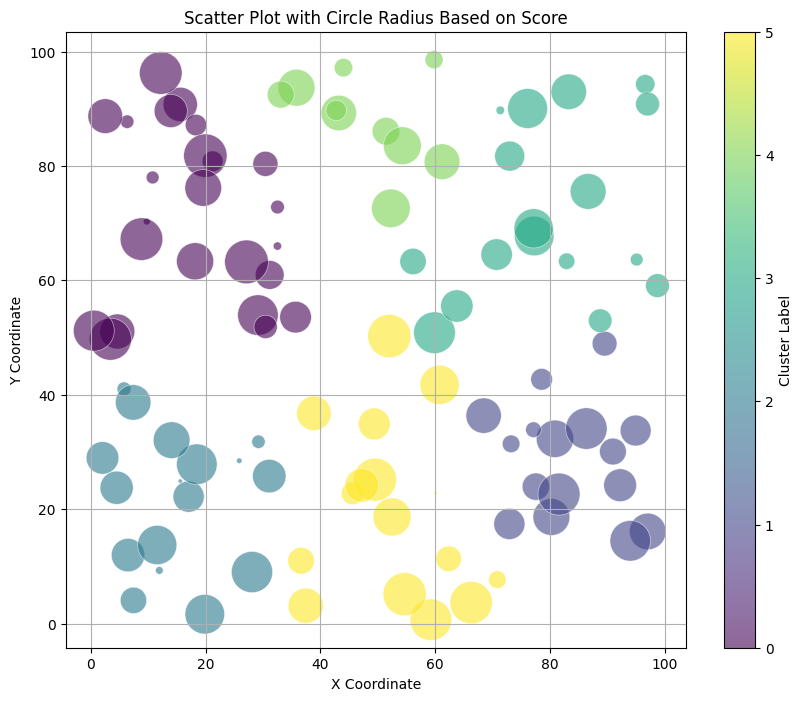

In [6]:
import matplotlib.pyplot as plt
# 可視化
plt.figure(figsize=(10, 8))

# 使用 scatter 函數繪製數據點
scatter = plt.scatter(
    data['x'], data['y'],
    s=data['score'] * 1000,  # 圓的半徑，乘以 1000 以放大可見性
    c=data['cluster_label'],  # 顏色根據 cluster_label 區分
    cmap='viridis',  # 使用顏色地圖
    alpha=0.6,  # 使點有一些透明度
    edgecolor='w',  # 點邊緣顏色
    linewidth=0.5  # 點邊緣寬度
)

# 添加顏色條
plt.colorbar(scatter, label='Cluster Label')

# 添加標籤和標題
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot with Circle Radius Based on Score')

# 顯示圖形
plt.grid(True)
plt.show()

In [7]:
pip install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Total Union Area: 98.95140887567392
Cluster 5 Union Area: 21.063578872350597
Cluster 3 Union Area: 13.549081839558182
Cluster 1 Union Area: 15.226040190590755
Cluster 0 Union Area: 24.441284885413268
Cluster 2 Union Area: 16.410194700712186
Cluster 4 Union Area: 8.45481869699325
           x          y     score  cluster_label  overlap_area
0   7.490802   0.628584  0.642032              5      0.000000
1  19.014286  12.728208  0.084140              3      0.000000
2  14.639879   6.287120  0.161629              1      0.000000
3  11.973170  10.171414  0.898554              3      0.307394
4   3.120373  18.151329  0.606429              0      0.760697


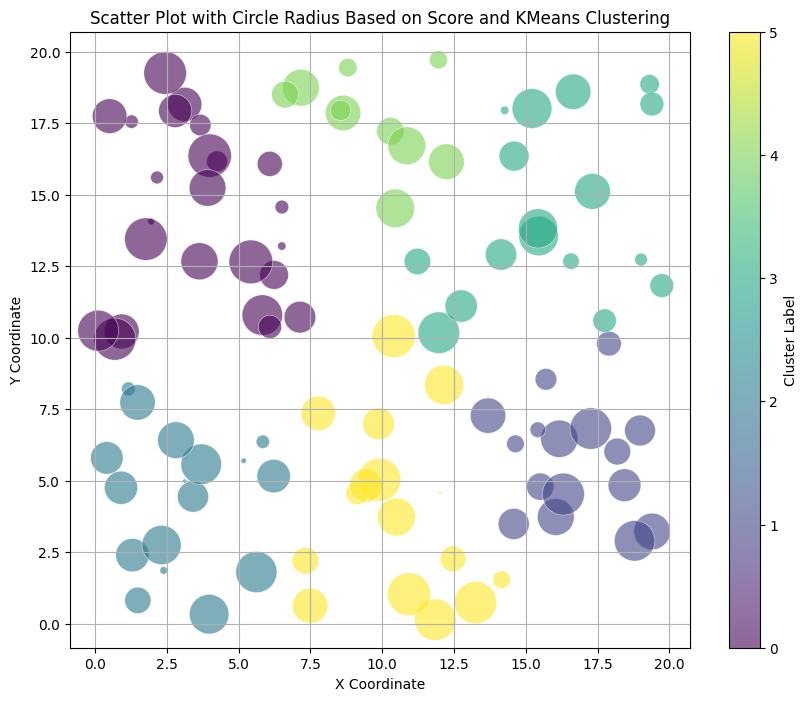

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union

# 設置隨機種子以便重現結果
np.random.seed(42)

# 生成數據的數量
num_samples = 100

# 生成 x 和 y 座標
x_coords = np.random.uniform(low=0.0, high=20.0, size=num_samples)
y_coords = np.random.uniform(low=0.0, high=20.0, size=num_samples)

# 生成 score 值（介於 0 和 1 之間）
scores = np.random.uniform(low=0.0, high=1.0, size=num_samples)

# 將數據組合成 DataFrame
data = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'score': scores
})

# 使用 KMeans 進行聚類
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster_label'] = kmeans.fit_predict(data[['x', 'y']])

# 計算每個圓的面積
def circle_area(radius):
    return np.pi * radius ** 2

# 計算總聯合面積和每個群的聯合面積
def calculate_union_area(circles):
    union_polygon = unary_union(circles)
    return union_polygon.area

def calculate_overlap_area(circles):
    total_overlap = 0
    for i, circle1 in enumerate(circles):
        for j, circle2 in enumerate(circles):
            if i < j:
                overlap = circle1.intersection(circle2).area
                total_overlap += overlap
    return total_overlap

# 計算每個圓形的重疊面積
def calculate_circle_overlap_area(data):
    overlaps = []
    circles = []
    for _, row in data.iterrows():
        circle = Point(row['x'], row['y']).buffer(row['score'])
        circles.append(circle)
    
    for i, circle in enumerate(circles):
        overlap_area = 0
        for j, other_circle in enumerate(circles):
            if i != j:
                overlap_area += circle.intersection(other_circle).area
        overlaps.append(overlap_area)
    
    return overlaps

# 計算總聯合面積
all_circles = [Point(row['x'], row['y']).buffer(row['score']) for _, row in data.iterrows()]
total_union_area = calculate_union_area(all_circles)

# 計算每個群的聯合面積
cluster_union_areas = {}
for cluster in data['cluster_label'].unique():
    cluster_data = data[data['cluster_label'] == cluster]
    cluster_circles = [Point(row['x'], row['y']).buffer(row['score']) for _, row in cluster_data.iterrows()]
    cluster_union_areas[cluster] = calculate_union_area(cluster_circles)

# 計算每個圓形的重疊面積
data['overlap_area'] = calculate_circle_overlap_area(data)

# 顯示計算結果
print(f'Total Union Area: {total_union_area}')
for cluster, area in cluster_union_areas.items():
    print(f'Cluster {cluster} Union Area: {area}')

# 顯示 DataFrame 的前幾行
print(data.head())

# 可視化
plt.figure(figsize=(10, 8))

# 使用 scatter 函數繪製數據點
scatter = plt.scatter(
    data['x'], data['y'],
    s=data['score'] * 1000,  # 圓的半徑，乘以 1000 以放大可見性
    c=data['cluster_label'],  # 顏色根據 cluster_label 區分
    cmap='viridis',  # 使用顏色地圖
    alpha=0.6,  # 使點有一些透明度
    edgecolor='w',  # 點邊緣顏色
    linewidth=0.5  # 點邊緣寬度
)

# 添加顏色條
plt.colorbar(scatter, label='Cluster Label')

# 添加標籤和標題
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot with Circle Radius Based on Score and KMeans Clustering')

# 顯示圖形
plt.grid(True)
plt.show()